<a href="https://colab.research.google.com/github/ayushman0406/Price-prediction-of-Airbnb/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv("machinelearning.csv")

In [3]:
customers.head()

,listing_id,subjectivity,sentiment,host_respose_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,17475,0.631559,0.419558,hour,100%,96%,1.0,1.0,5.0,1.0,...,1.0,4.40,4.74,4.21,4.79,4.68,4.84,4.47,0.0,0.16
1,18674,0.608874,0.391424,hour,97%,87%,0.0,47.0,48.0,1.0,...,0.0,4.33,4.44,4.62,4.74,4.67,4.77,4.28,1.0,0.31
2,23197,0.594656,0.374013,hour,100%,95%,1.0,6.0,10.0,1.0,...,1.0,4.77,4.92,4.88,4.93,4.97,4.59,4.64,0.0,0.48
3,32711,0.652872,0.443410,hour,100%,100%,0.0,3.0,15.0,1.0,...,0.0,4.48,4.46,4.49,4.87,4.86,4.87,4.54,1.0,0.66
4,34241,0.490658,0.253972,hour,100%,99%,0.0,3.0,3.0,1.0,...,0.0,3.40,4.00,3.80,3.60,4.60,4.20,3.40,0.0,0.05


In [16]:
customers.dropna(inplace=True)

In [17]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4253 entries, 0 to 5600
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   listing_id                    4253 non-null   int64  
 1   subjectivity                  4253 non-null   float64
 2   sentiment                     4253 non-null   float64
 3   host_respose_time             4253 non-null   object 
 4   host_response_rate            4253 non-null   object 
 5   host_acceptance_rate          4253 non-null   object 
 6   host_is_superhost             4253 non-null   float64
 7   host_listings_count           4253 non-null   float64
 8   host_total_listings_count     4253 non-null   float64
 9   host_has_profile_pic          4253 non-null   float64
 10  host_identity_verified        4253 non-null   float64
 11  neighbourhood_group_cleansed  4253 non-null   object 
 12  latitude                      4253 non-null   float64
 13  lon

In [18]:
customers['price'] = pd.to_numeric(customers['price'], errors='coerce')

In [19]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4253 entries, 0 to 5600
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   listing_id                    4253 non-null   int64  
 1   subjectivity                  4253 non-null   float64
 2   sentiment                     4253 non-null   float64
 3   host_respose_time             4253 non-null   object 
 4   host_response_rate            4253 non-null   object 
 5   host_acceptance_rate          4253 non-null   object 
 6   host_is_superhost             4253 non-null   float64
 7   host_listings_count           4253 non-null   float64
 8   host_total_listings_count     4253 non-null   float64
 9   host_has_profile_pic          4253 non-null   float64
 10  host_identity_verified        4253 non-null   float64
 11  neighbourhood_group_cleansed  4253 non-null   object 
 12  latitude                      4253 non-null   float64
 13  lon

In [20]:
customers.columns

Index(['listing_id', 'subjectivity', 'sentiment', 'host_respose_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [21]:
y = customers['price']

In [22]:
X = customers[['subjectivity', 'sentiment',
     'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
        'room_type', 'accommodates',  'beds',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month']]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-9.32997590e+00  7.46903241e+01  1.26507155e+01 -1.73530063e-01
 -1.12857727e-02 -1.94222416e-12 -5.89389478e-01  1.46775265e+01
  1.86977892e+01  6.05168093e+00 -3.24352823e-01 -1.63276925e-03
 -3.55271368e-14 -3.23144873e-01  7.30964311e-01  3.83239809e-02
 -5.15490747e-02 -7.38548431e-02  4.93391608e-02 -1.22223075e+00
  2.09227419e+01  3.08801511e+00  1.27232807e+01 -1.08536170e+01
 -2.71618552e+00  1.70731552e+01 -1.16017301e+01  8.83823980e+00
  2.33638850e-01]


In [29]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

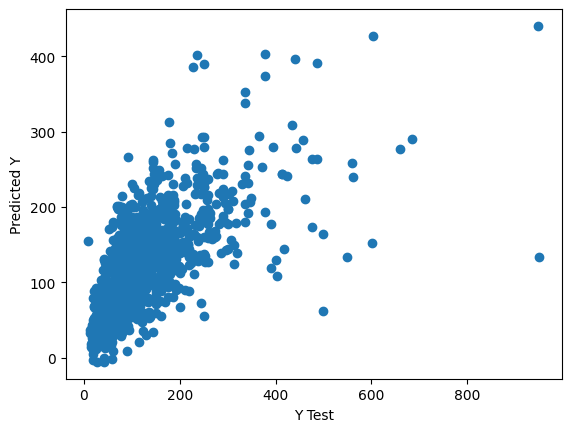

In [30]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 44.73534968747043
MSE: 4874.888938729247
RMSE: 69.82040488803575


<ipython-input-32-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


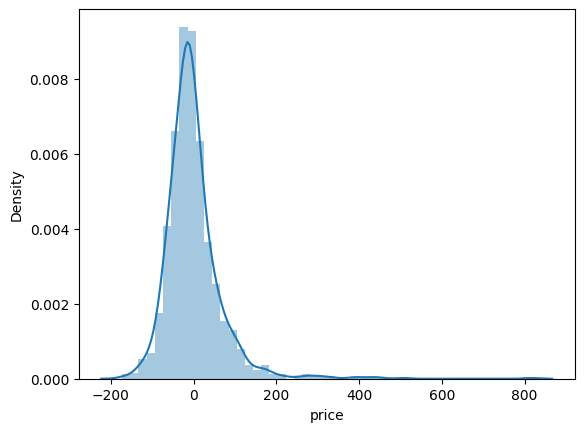

In [32]:
sns.distplot((y_test-predictions),bins=50);

In [33]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
subjectivity,-9.329976e+00
sentiment,7.469032e+01
host_is_superhost,1.265072e+01
host_listings_count,-1.735301e-01
host_total_listings_count,-1.128577e-02
host_has_profile_pic,-1.942224e-12
host_identity_verified,-5.893895e-01
room_type,1.467753e+01
accommodates,1.869779e+01
beds,6.051681e+00
